## Lab 2 Question 6

Filtering ECG Signals

In [1]:
import pandas as pd
import scipy.fftpack
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

6.1 Plot the signals

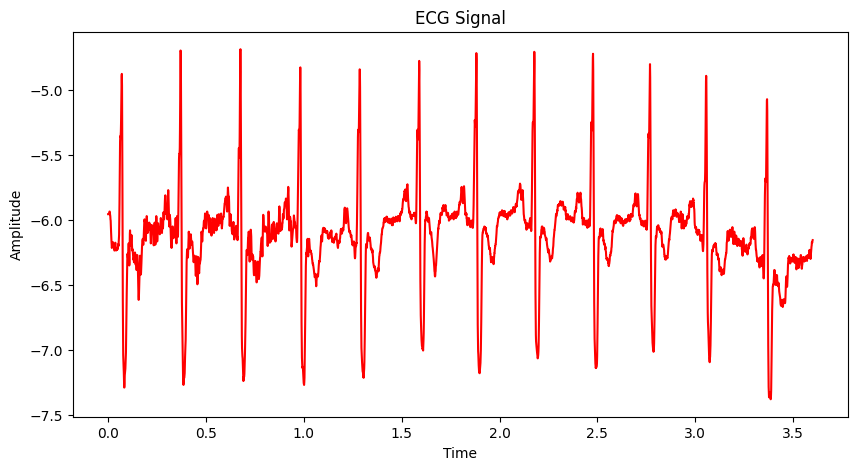

In [2]:
dataset = pd.read_csv("ECG.csv")

y = [e for e in dataset.hart]

N = len(y)  # Number of samplepoints
Fs = 1000  # sample spacing
T = 1.0 / Fs
x = np.linspace(0.0, N * T, N)  # Compute x-axis

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ECG Signal')
plt.show()

6.2 Process signal to be more smooth

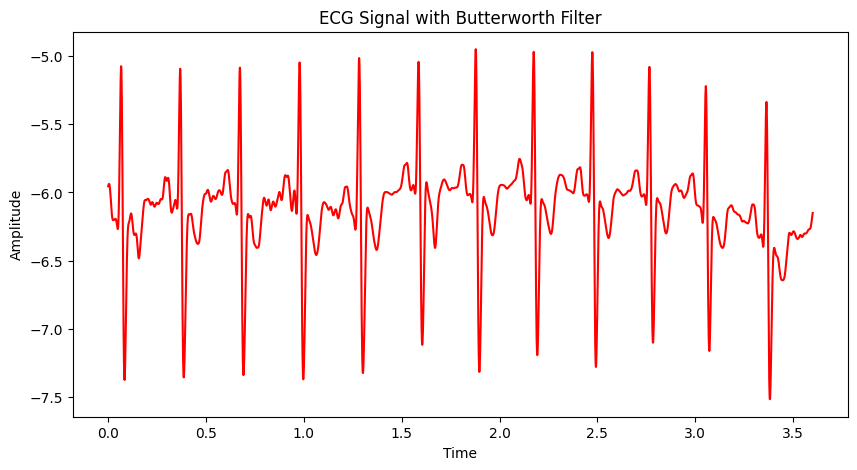

In [3]:
b, a = signal.butter(4, 50 / (Fs / 2), 'low')
y_filt = signal.filtfilt(b, a, y)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x, y_filt, 'r')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('ECG Signal with Butterworth Filter')
plt.show()

6.3 Plot in frequency domain

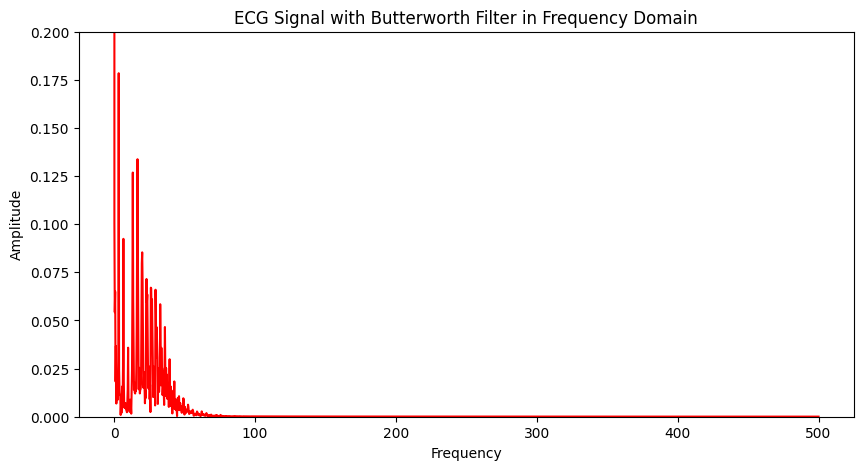

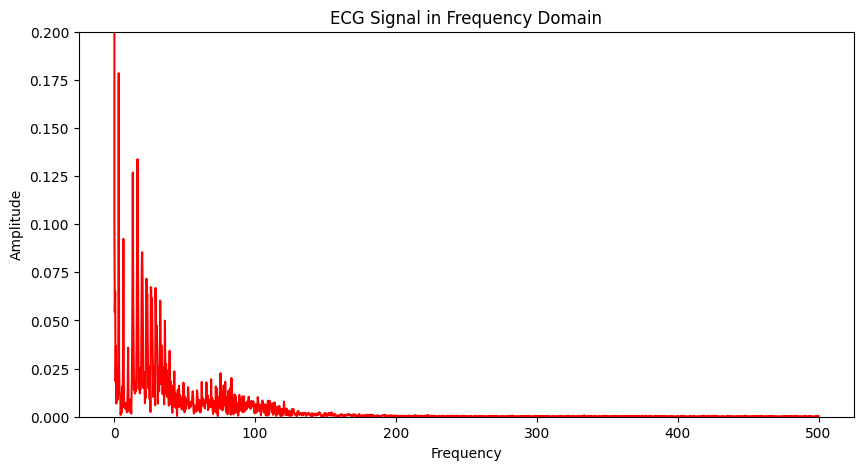

In [4]:
yf = scipy.fftpack.fft(y)  # Fast Fourier Transform
yff = scipy.fftpack.fft(y_filt)

# Plot yff in frequency domain
xf = np.linspace(0.0, 1.0 / (2.0 * T), N // 2)
plt.figure(figsize=(10, 5))
plt.plot(xf, 2.0 / N * np.abs(yff[:N // 2]), 'r')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.ylim(0, 0.2)
plt.title('ECG Signal with Butterworth Filter in Frequency Domain')

# Plot yf in frequency domain
plt.figure(figsize=(10, 5))
plt.plot(xf, 2.0 / N * np.abs(yf[:N // 2]), 'r')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.ylim(0, 0.2)
plt.title('ECG Signal in Frequency Domain')
plt.show()
